In [141]:
'''
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import os
from PIL import Image
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.patches as patches
'''

'\nfrom tensorflow import keras\nfrom keras import models\nfrom keras import layers\nfrom keras.models import Sequential, load_model\nfrom keras.layers import Dense, Dropout\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\n%matplotlib inline\nimport seaborn as sns\nfrom collections import Counter\nimport os\nfrom PIL import Image\nimport cv2\nimport random\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras.utils import to_categorical\nfrom sklearn.model_selection import train_test_split\n\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\nfrom tensorflow.keras.preprocessing.image import img_to_array\nimport matplotlib.patches as patches\n'

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.patches as patches
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
import pickle
import cvlib as cv
from cvlib.object_detection import draw_bbox
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [143]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

main_directory = os.getcwd()
train_directory = main_directory + '/' + 'Train'
test_directory = main_directory + '/' + 'Test'

In [144]:
train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [145]:
sorted_train = train.sort_values(by='ClassId')
sorted_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
426,30,30,5,5,25,25,0,Train/0/00000_00002_00006.png
494,70,74,7,7,64,68,0,Train/0/00000_00004_00014.png
495,72,75,7,6,65,68,0,Train/0/00000_00004_00015.png
496,74,79,7,7,68,72,0,Train/0/00000_00004_00016.png
497,74,80,6,8,67,73,0,Train/0/00000_00004_00017.png
...,...,...,...,...,...,...,...,...
39053,40,43,5,6,35,38,42,Train/42/00042_00002_00024.png
39054,42,44,5,5,37,39,42,Train/42/00042_00002_00025.png
39055,45,47,6,6,40,42,42,Train/42/00042_00002_00026.png
39087,68,71,6,6,62,65,42,Train/42/00042_00003_00028.png


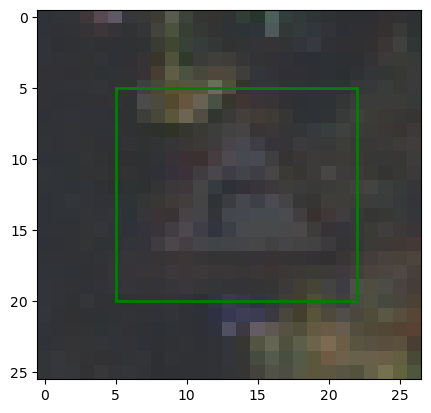

In [146]:
# Get the image path and ROI coordinates
image_path = train['Path'].iloc[0]
roi_x1 = train['Roi.X1'].iloc[0]
roi_y1 = train['Roi.Y1'].iloc[0]
roi_x2 = train['Roi.X2'].iloc[0]
roi_y2 = train['Roi.Y2'].iloc[0]

# Load the image
image = Image.open(image_path)

# Create a figure and subplot
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a rectangle patch for the ROI
roi_width = roi_x2 - roi_x1
roi_height = roi_y2 - roi_y1
rect = patches.Rectangle((roi_x1, roi_y1), roi_width, roi_height, linewidth=2, edgecolor='g', facecolor='none')

# Add the ROI rectangle to the plot
ax.add_patch(rect)

# Show the plot
plt.show()

# Plot the Number of images

In [147]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

NUM_CATEGORIES = len(classes)

In [148]:
numImages = {}
for i in range(0, NUM_CATEGORIES):
    numImages[i] = len(sorted_train[sorted_train['ClassId'] == i])
numImages

{0: 210,
 1: 2220,
 2: 2250,
 3: 1410,
 4: 1980,
 5: 1860,
 6: 420,
 7: 1440,
 8: 1410,
 9: 1470,
 10: 2010,
 11: 1320,
 12: 2100,
 13: 2160,
 14: 780,
 15: 630,
 16: 420,
 17: 1110,
 18: 1200,
 19: 210,
 20: 360,
 21: 330,
 22: 390,
 23: 510,
 24: 270,
 25: 1500,
 26: 600,
 27: 240,
 28: 540,
 29: 270,
 30: 450,
 31: 780,
 32: 240,
 33: 689,
 34: 420,
 35: 1200,
 36: 390,
 37: 210,
 38: 2070,
 39: 300,
 40: 360,
 41: 240,
 42: 240}

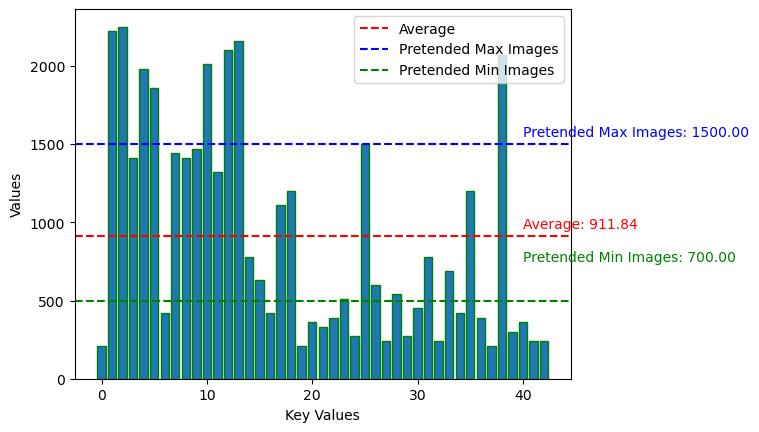

In [163]:
#Plot a histogram for the number of images per class
# Plot the histogram
plt.bar(numImages.keys(), numImages.values(), edgecolor="green")

# Set the x-axis label
plt.xlabel('Key Values')

# Set the y-axis label
plt.ylabel('Values')

# Calculate the average of the values
average = np.mean(list(numImages.values()))
# Plot a horizontal line for the average
plt.axhline(average, color='r', linestyle='--', label='Average')
plt.text(40, average + 50, f"Average: {average:.2f}", color='red')
plt.axhline(1500, color='b', linestyle='--', label='Pretended Max Images')
plt.text(40, 1500 + 50, f"Pretended Max Images: {1500:.2f}", color='blue')
plt.axhline(500, color='g', linestyle='--', label='Pretended Min Images')
plt.text(40, 700 + 50, f"Pretended Min Images: {700:.2f}", color='green')

# Show the legend
plt.legend()

# Show the plot
plt.show()


# Get the Train Data

In [150]:
sorted_train = sorted_train.reset_index()
sorted_train.drop('index', axis=1, inplace=True)
sorted_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,30,30,5,5,25,25,0,Train/0/00000_00002_00006.png
1,70,74,7,7,64,68,0,Train/0/00000_00004_00014.png
2,72,75,7,6,65,68,0,Train/0/00000_00004_00015.png
3,74,79,7,7,68,72,0,Train/0/00000_00004_00016.png
4,74,80,6,8,67,73,0,Train/0/00000_00004_00017.png
...,...,...,...,...,...,...,...,...
39204,40,43,5,6,35,38,42,Train/42/00042_00002_00024.png
39205,42,44,5,5,37,39,42,Train/42/00042_00002_00025.png
39206,45,47,6,6,40,42,42,Train/42/00042_00002_00026.png
39207,68,71,6,6,62,65,42,Train/42/00042_00003_00028.png


In [168]:
X_train = []
y_train= []

train_paths = []

for i in range(0, len(sorted_train)):
    train_paths.append(sorted_train['Path'].iloc[i])
    y_train.append(sorted_train['ClassId'].iloc[i])

for path in train_paths:
    try:
        image = cv2.imread(path) #Gets the image in array shape
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Change back to RGB
        image = Image.fromarray(image, 'RGB')
        image = image.resize((32, 32))
        image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
        X_train.append(np.array(image))
    except:
        print("Error in " + path)

    


In [169]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)

print(X_train.shape)
print(y_train.shape)

(39209, 32, 32, 3)
(39209, 43)


# Data Augmentation (Remove images from overpopulated classes)

In [170]:
# Count the number of images per label
label_counter = defaultdict(int)
for label in np.argmax(y_train, axis=1):
    label_counter[label] += 1

# Create a sorted dictionary of label counts
sorted_label_counts = dict(sorted(label_counter.items()))

In [171]:
# Determine the most populated labels
most_populated_labels = sorted(sorted_label_counts, key=label_counter.get, reverse=True)

# Create a balanced dataset with a maximum of 1500 images per label
balanced_X_train = []
balanced_y_train = []
max_images_per_label = 1500

new_label_counts = {}

for label in most_populated_labels:
    label_indices = np.where(np.argmax(y_train, axis=1) == label)[0]
    np.random.shuffle(label_indices)
    selected_indices = label_indices[:max_images_per_label]
    balanced_X_train.extend(X_train[selected_indices])
    balanced_y_train.extend(y_train[selected_indices])
    
    new_label_counts[label] = len(selected_indices)

# Convert balanced datasets to numpy arrays
X_train = np.array(balanced_X_train)
y_train = np.array(balanced_y_train)

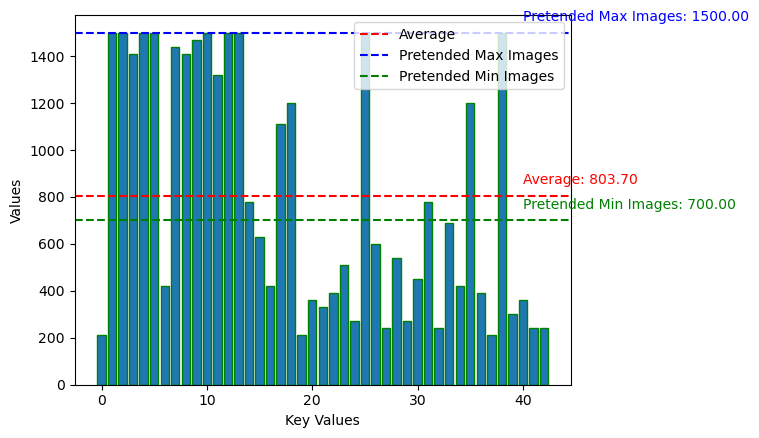

In [172]:
#Plot a histogram for the number of images per class
# Plot the histogram
plt.bar(new_label_counts.keys(), new_label_counts.values(), edgecolor="green")

# Set the x-axis label
plt.xlabel('Key Values')

# Set the y-axis label
plt.ylabel('Values')

# Calculate the average of the values
average = np.mean(list(new_label_counts.values()))
# Plot a horizontal line for the average
plt.axhline(average, color='r', linestyle='--', label='Average')
plt.text(40, average + 50, f"Average: {average:.2f}", color='red')
plt.axhline(1500, color='b', linestyle='--', label='Pretended Max Images')
plt.text(40, 1500 + 50, f"Pretended Max Images: {1500:.2f}", color='blue')
plt.axhline(700, color='g', linestyle='--', label='Pretended Min Images')
plt.text(40, 700 + 50, f"Pretended Min Images: {700:.2f}", color='green')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [173]:
new_label_counts

{2: 1500,
 1: 1500,
 13: 1500,
 12: 1500,
 38: 1500,
 10: 1500,
 4: 1500,
 5: 1500,
 25: 1500,
 9: 1470,
 7: 1440,
 3: 1410,
 8: 1410,
 11: 1320,
 18: 1200,
 35: 1200,
 17: 1110,
 14: 780,
 31: 780,
 33: 689,
 15: 630,
 26: 600,
 28: 540,
 23: 510,
 30: 450,
 6: 420,
 16: 420,
 34: 420,
 22: 390,
 36: 390,
 20: 360,
 40: 360,
 21: 330,
 39: 300,
 24: 270,
 29: 270,
 27: 240,
 32: 240,
 41: 240,
 42: 240,
 0: 210,
 19: 210,
 37: 210}

# Data Augmentation (Add images from less populated classes)

In [174]:
# Create an empty list for balanced dataset
balanced_X_train = []
balanced_y_train = []

# Minimum images per label
min_images_per_label = 700

# Create ImageDataGenerator for augmentation
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1)

for label, count in new_label_counts.items():
    label_indices = np.where(np.argmax(y_train, axis=1) == label)[0]
    num_existing_images = count
    num_new_images = min_images_per_label - num_existing_images
    
    # Add new images to reach minimum count
    if num_new_images > 0:
        selected_indices = np.random.choice(label_indices, size=num_new_images, replace=True)
        for index in selected_indices:
            image = X_train[index]
            image = np.expand_dims(image, axis=0)
            augmented_images = datagen.flow(image, batch_size=1)
            for _ in range(num_new_images):
                augmented_image = augmented_images.next()[0]
                balanced_X_train.append(augmented_image)
                balanced_y_train.append(y_train[index])
    
    new_label_counts[label] += num_new_images

# Convert balanced datasets to numpy arrays
X_train = np.array(balanced_X_train)
y_train = np.array(balanced_y_train)

# Check the updated label counts
print(new_label_counts)




MemoryError: Unable to allocate 34.7 GiB for an array with shape (3031221, 32, 32, 3) and data type float32

In [ ]:
# Plot a histogram of the updated label counts
plt.bar(new_label_counts.keys(), new_label_counts.values())
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Updated Label Counts')
plt.show()

# Get Test Data

In [32]:
sorted_test = test.sort_values(by='ClassId')
sorted_test = sorted_test.reset_index()
sorted_test.drop('index', axis=1, inplace=True)
sorted_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,49,51,6,5,44,46,0,Test/05945.png
1,31,33,6,6,25,28,0,Test/07712.png
2,45,49,5,5,40,44,0,Test/00807.png
3,32,31,6,5,27,26,0,Test/00809.png
4,31,34,5,5,26,29,0,Test/04512.png
...,...,...,...,...,...,...,...,...
12625,32,33,5,5,26,27,42,Test/04496.png
12626,27,28,6,5,22,23,42,Test/09593.png
12627,41,43,6,6,36,38,42,Test/11842.png
12628,49,53,6,5,44,48,42,Test/05786.png


In [33]:
X_test = []
y_test= []

test_paths = []

for i in range(0, len(sorted_test)):
    test_paths.append(sorted_test['Path'].iloc[i])
    y_test.append(sorted_test['ClassId'].iloc[i])

for path in test_paths:
    try:
        image = cv2.imread(path) #Gets the image in array shape
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Change back to RGB
        image = Image.fromarray(image, 'RGB')
        image = image.resize((32, 32))
        image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
        X_test.append(np.array(image))
    except:
        print("Error in " + path)


In [34]:
X_test = np.array(X_test)/255
y_test = np.array(y_test)

#One Hot Encoding
y_test = keras.utils.to_categorical(y_test, NUM_CATEGORIES)


print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630, 43)


# Model

In [35]:
#SHUFFLE THE DATA THE SAME WAY
# Generate a random permutation of indices
indices = np.random.permutation(len(X_train))

# Shuffle both arrays using the same indices
X_train = X_train[indices]
y_train = y_train[indices]

In [36]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])


lr = 0.001
epochs = 30


In [37]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
with open('kaggleHistory.pickle', 'wb') as f:
    pickle.dump(history.history, f)
model.save('kaggleModel.h5')

Epoch 1/30
1226/1226 [==============================] - 51s 41ms/step - loss: 0.2789 - accuracy: 0.9254 - val_loss: 0.1667 - val_accuracy: 0.9530
Epoch 2/30
1226/1226 [==============================] - 50s 41ms/step - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.1211 - val_accuracy: 0.9678
Epoch 3/30
1226/1226 [==============================] - 51s 41ms/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.1602 - val_accuracy: 0.9561
Epoch 4/30
1226/1226 [==============================] - 50s 41ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.1104 - val_accuracy: 0.9694
Epoch 5/30
1226/1226 [==============================] - 50s 41ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0882 - val_accuracy: 0.9766
Epoch 6/30
1226/1226 [==============================] - 50s 41ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.1622 - val_accuracy: 0.9610
Epoch 7/30
1226/1226 [==============================] - 49s 40ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.1184 -

In [41]:
# Load model history from file
with open('kaggleHistory.pickle', 'rb') as f:
    history = pickle.load(f)
    
model = load_model("kaggleModel.h5")  

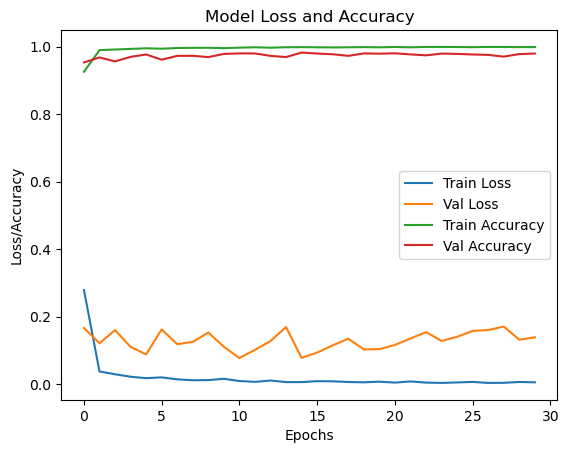

In [42]:
# Plot the loaded history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(['Train Loss', 'Val Loss', 'Train Accuracy', 'Val Accuracy'], loc='center right')
plt.show()

In [46]:
test = pd.read_csv(main_directory + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((32, 32))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred_probabilities = model.predict(X_test)
preds = np.argmax(pred_probabilities, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, preds)*100)

395/395 [==============================] - 5s 12ms/step
Test Data accuracy:  93.1353919239905


In [47]:
preds
unique, counts = np.unique(preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 63, 1: 834, 2: 750, 3: 433, 4: 655, 5: 701, 6: 121, 7: 470, 8: 475, 9: 473, 10: 657, 11: 421, 12: 716, 13: 757, 14: 245, 15: 222, 16: 149, 17: 277, 18: 387, 19: 61, 20: 104, 21: 99, 22: 120, 23: 180, 24: 89, 25: 482, 26: 174, 27: 29, 28: 145, 29: 85, 30: 110, 31: 345, 32: 67, 33: 157, 34: 54, 35: 369, 36: 114, 37: 61, 38: 677, 39: 63, 40: 86, 41: 59, 42: 94}


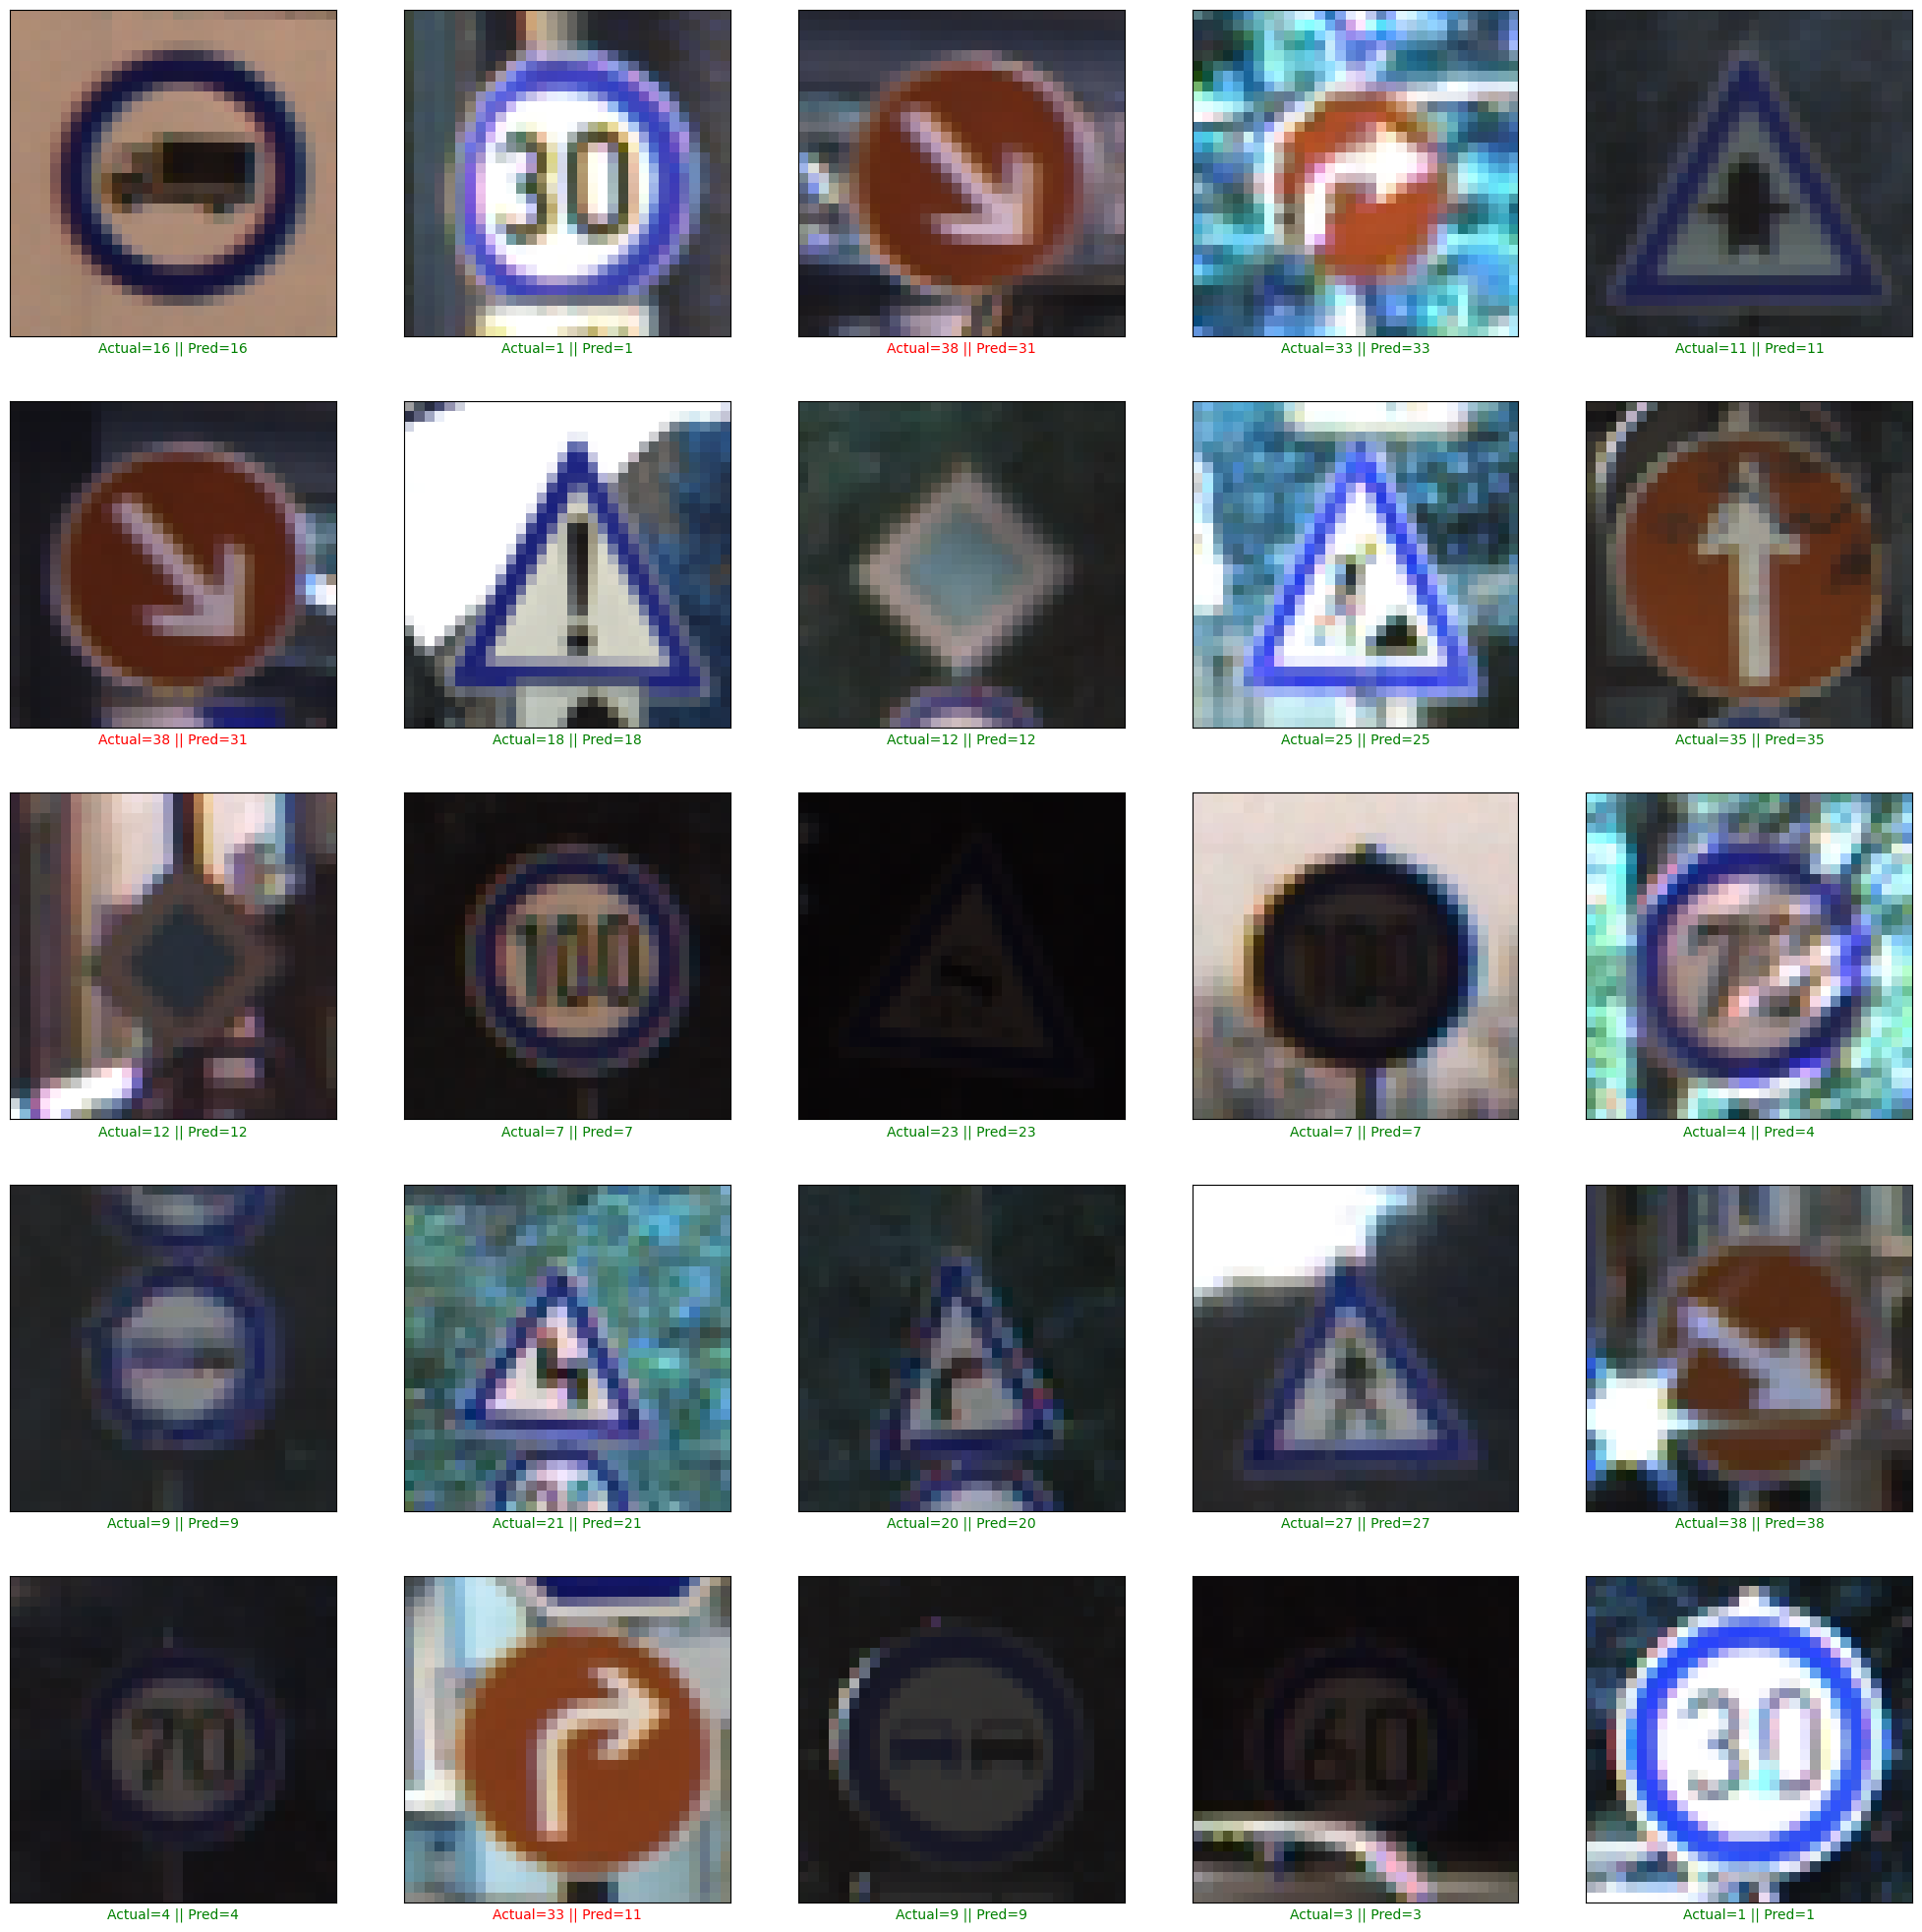

In [48]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = preds[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

# Transfer Learning

In [49]:
pre_trained_model1 = Sequential()
ResNet50 = keras.applications.ResNet50(
    include_top=False, #Não queremos a input layer e a output layer
    weights="imagenet",
    input_shape=(32, 32, 3),
    pooling='avg',
    classes=43)

for layer in ResNet50.layers:
    layer.trainable = False
    
pre_trained_model1.add(ResNet50)
pre_trained_model1.add(keras.layers.Flatten())
pre_trained_model1.add(keras.layers.Dense(512, activation='relu'))
pre_trained_model1.add(keras.layers.BatchNormalization())
pre_trained_model1.add(keras.layers.Dropout(rate=0.5))
pre_trained_model1.add(keras.layers.Dense(43, activation='softmax'))

In [50]:
lr = 0.001
epochs = 30
pre_trained_model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
pre_trained_model1.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
1226/1226 [==============================] - 109s 88ms/step - loss: 2.4389 - accuracy: 0.3256 - val_loss: 8.4556 - val_accuracy: 0.0215
Epoch 2/30
1226/1226 [==============================] - 107s 87ms/step - loss: 1.9418 - accuracy: 0.4375 - val_loss: 9.1083 - val_accuracy: 0.0232
Epoch 3/30
1226/1226 [==============================] - 107s 87ms/step - loss: 1.8067 - accuracy: 0.4718 - val_loss: 10.8664 - val_accuracy: 0.0188
Epoch 4/30
1226/1226 [==============================] - 104s 85ms/step - loss: 1.7257 - accuracy: 0.4960 - val_loss: 9.5981 - val_accuracy: 0.0416
Epoch 5/30
1226/1226 [==============================] - 106s 86ms/step - loss: 1.6648 - accuracy: 0.5060 - val_loss: 12.6463 - val_accuracy: 0.0408
Epoch 6/30
  92/1226 [=>............................] - ETA: 1:18 - loss: 1.6453 - accuracy: 0.5034

KeyboardInterrupt: 

# Test with real data

In [ ]:
def preprocess_frame(frame):
    # Perform any necessary preprocessing steps on the frame
    # For example, you can resize, normalize, or apply other transformations
    preprocessed_frame = cv2.resize(frame, (30, 30))
    preprocessed_frame = preprocessed_frame / 255.0  # Normalize to [0, 1] range
    return preprocessed_frame


# Open the video file or capture video from a camera
video_path = 'D:/MestradoEngenhariaInformatica/2_Semestre/AAA/PROJETO/video.mp4'
cap = cv2.VideoCapture(video_path)

# Define the window size and stride for sliding window
window_size = (32, 32)  # Size of the sliding window
stride = 10  # Stride for sliding window

# Select frames to classify
frames_to_classify = [100, 200, 300, 400, 500, 600]  # Add or remove frame indices as needed

# Iterate over the frames
for frame_index in frames_to_classify:
    # Set the frame position to the desired index
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = cap.read()

    if not ret:
        break

    # Iterate over the frame using sliding window
    for y in range(0, frame.shape[0] - window_size[0], stride):
        for x in range(0, frame.shape[1] - window_size[1], stride):
            # Extract the region of interest (ROI) using sliding window
            roi = frame[y:y+window_size[0], x:x+window_size[1]]

            # Preprocess the ROI
            preprocessed_roi = preprocess_frame(roi)

            # Perform traffic sign classification
            predictions = model.predict(np.expand_dims(preprocessed_roi, axis=0))
            predicted_class = np.argmax(predictions)

            # Draw bounding box and label on the frame if traffic sign is detected
            if predicted_class != background_class:  # Check if predicted class is not background
                cv2.rectangle(frame, (x, y), (x+window_size[1], y+window_size[0]), (0, 255, 0), 2)
                cv2.putText(frame, str(predicted_class), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with bounding boxes and labels
    cv2.imshow('Video', frame)
    # Wait for key press
    cv2.waitKey(0)

# Release the video capture and close the windows
cap.release()
cv2.destroyAllWindows()

# YOLO

In [ ]:
import os

train_yolo = train.copy()

# Create new columns for YOLO format
train_yolo['YOLO_XCenter'] = 0.0
train_yolo['YOLO_YCenter'] = 0.0
train_yolo['YOLO_Width'] = 0.0
train_yolo['YOLO_Height'] = 0.0

# Iterate over each row in the dataframe
for index, row in train_yolo.iterrows():
    x1 = row['Roi.X1']
    y1 = row['Roi.Y1']
    x2 = row['Roi.X2']
    y2 = row['Roi.Y2']
    width = x2 - x1
    height = y2 - y1
    x_center = (x1 + x2) / 2
    y_center = (y1 + y2) / 2
    image_width = row['Width']
    image_height = row['Height']

    # Normalize the values
    x_center_normalized = x_center / image_width
    y_center_normalized = y_center / image_height
    width_normalized = width / image_width
    height_normalized = height / image_height

    # Update the corresponding columns in the dataframe
    train_yolo.at[index, 'YOLO_XCenter'] = x_center_normalized
    train_yolo.at[index, 'YOLO_YCenter'] = y_center_normalized
    train_yolo.at[index, 'YOLO_Width'] = width_normalized
    train_yolo.at[index, 'YOLO_Height'] = height_normalized

# Update the image path in the dataframe
train_yolo['Path'] = train_yolo['Path'].apply(lambda path: os.path.join('yoloData/Images/Train', os.path.basename(path)).replace("\\", "/"))

# Print the updated dataframe
sorted_train_yolo = train_yolo.sort_values(by='Path')
sorted_train_yolo = sorted_train_yolo.reset_index(drop=True)
sorted_train_yolo

In [ ]:
# Iterate over each row in the dataframe
for index, row in sorted_train_yolo.iterrows():
    # Extract the necessary information
    class_id = row['ClassId']
    image_path = row['Path']
    yolo_x_center = row['YOLO_XCenter']
    yolo_y_center = row['YOLO_YCenter']
    yolo_width = row['YOLO_Width']
    yolo_height = row['YOLO_Height']
    
    # Create the YOLO annotation string
    yolo_annotation = f"{class_id} {yolo_x_center} {yolo_y_center} {yolo_width} {yolo_height}"
    
    # Generate the output file path
    file_name = os.path.basename(image_path)
    output_file = os.path.join("D:/MestradoEngenhariaInformatica/2_Semestre/AAA/PROJETO/yoloData/labels/train/", os.path.splitext(file_name)[0] + '.txt')
    
    # Save the YOLO annotation file
    with open(output_file, 'w') as f:
        f.write(yolo_annotation)

In [ ]:
test_yolo = test.copy()

# Create new columns for YOLO format
test_yolo['YOLO_XCenter'] = 0.0
test_yolo['YOLO_YCenter'] = 0.0
test_yolo['YOLO_Width'] = 0.0
test_yolo['YOLO_Height'] = 0.0

# Iterate over each row in the dataframe
for index, row in test_yolo.iterrows():
    x1 = row['Roi.X1']
    y1 = row['Roi.Y1']
    x2 = row['Roi.X2']
    y2 = row['Roi.Y2']
    width = x2 - x1
    height = y2 - y1
    x_center = (x1 + x2) / 2
    y_center = (y1 + y2) / 2
    image_width = row['Width']
    image_height = row['Height']

    # Normalize the values
    x_center_normalized = x_center / image_width
    y_center_normalized = y_center / image_height
    width_normalized = width / image_width
    height_normalized = height / image_height

    # Update the corresponding columns in the dataframe
    test_yolo.at[index, 'YOLO_XCenter'] = x_center_normalized
    test_yolo.at[index, 'YOLO_YCenter'] = y_center_normalized
    test_yolo.at[index, 'YOLO_Width'] = width_normalized
    test_yolo.at[index, 'YOLO_Height'] = height_normalized

# Update the image path in the dataframe
test_yolo['Path'] = test_yolo['Path'].apply(lambda path: os.path.join('yoloData/Images/val/', os.path.basename(path)).replace("\\", "/"))

# Print the updated dataframe
sorted_test_yolo = test_yolo.sort_values(by='Path')
sorted_test_yolo = sorted_test_yolo.reset_index(drop=True)
sorted_test_yolo

In [ ]:
# Iterate over each row in the dataframe
for index, row in sorted_test_yolo.iterrows():
    # Extract the necessary information
    class_id = row['ClassId']
    image_path = row['Path']
    yolo_x_center = row['YOLO_XCenter']
    yolo_y_center = row['YOLO_YCenter']
    yolo_width = row['YOLO_Width']
    yolo_height = row['YOLO_Height']
    
    # Create the YOLO annotation string
    yolo_annotation = f"{class_id} {yolo_x_center} {yolo_y_center} {yolo_width} {yolo_height}"
    
    # Generate the output file path
    file_name = os.path.basename(image_path)
    output_file = os.path.join("D:/MestradoEngenhariaInformatica/2_Semestre/AAA/PROJETO/yoloData/labels/val", os.path.splitext(file_name)[0] + '.txt')
    
    # Save the YOLO annotation file
    with open(output_file, 'w') as f:
        f.write(yolo_annotation)

In [ ]:
import torch
from IPython.display import Image, clear_output

In [ ]:
os.chdir("D:/MestradoEngenhariaInformatica/2_Semestre/AAA/PROJETO/yolov5/")
!python train.py --img 640 --batch 2 --epochs 3 --data custom_data.yaml --weights yolov5s.pt --nosave --cache